# UNEMPLOYMENT ANALYSIS WITH PYTHON 

## Problem Statement :

## Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force. We have seen a sharp increase in the unemployment rate during Covid-19, so analyzing the unemployment rate can be a good data science project. 


In [1]:
#importing modules 
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.graph_objects as go
import seaborn as sns
import plotly.express as px
%matplotlib inline
import datetime as dt
import calendar

In [2]:
df = pd.read_csv("Unemployment_in_India.csv")
df2 = pd.read_csv("Unemployment_Rate_upto_11_2020.csv")

In [3]:
df.head

<bound method NDFrame.head of              Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019    Monthly                              3.65   
1    Andhra Pradesh   30-06-2019    Monthly                              3.05   
2    Andhra Pradesh   31-07-2019    Monthly                              3.75   
3    Andhra Pradesh   31-08-2019    Monthly                              3.32   
4    Andhra Pradesh   30-09-2019    Monthly                              5.17   
..              ...          ...        ...                               ...   
763             NaN          NaN        NaN                               NaN   
764             NaN          NaN        NaN                               NaN   
765             NaN          NaN        NaN                               NaN   
766             NaN          NaN        NaN                               NaN   
767             NaN          NaN        NaN                               NaN  

In [4]:
df2.head

<bound method NDFrame.head of              Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-01-2020          M                              5.48   
1    Andhra Pradesh   29-02-2020          M                              5.83   
2    Andhra Pradesh   31-03-2020          M                              5.79   
3    Andhra Pradesh   30-04-2020          M                             20.51   
4    Andhra Pradesh   31-05-2020          M                             17.43   
..              ...          ...        ...                               ...   
262     West Bengal   30-06-2020          M                              7.29   
263     West Bengal   31-07-2020          M                              6.83   
264     West Bengal   31-08-2020          M                             14.87   
265     West Bengal   30-09-2020          M                              9.35   
266     West Bengal   31-10-2020          M                              9.98  

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    267 non-null    object 
 1    Date                                     267 non-null    object 
 2    Frequency                                267 non-null    object 
 3    Estimated Unemployment Rate (%)          267 non-null    float64
 4    Estimated Employed                       267 non-null    int64  
 5    Estimated Labour Participation Rate (%)  267 non-null    float64
 6   Region.1                                  267 non-null    object 
 7   longitude                                 267 non-null    float64
 8   latitude                                  267 non-null    float64
dtypes: float64(4), int64(1), object(4)
memory usage: 18.9+ KB


Estimated Labour Participation Rate(%) --> measure that represents the proportion of the wrong0age population that is either employed or actively seeking employement

                 Labour Force Participation Rate (%) = (Labour Force / Working-Age Population) x 100
                 
                 The Labour Force includes both employed individuals and those who are unemployed but 
                 actively seeking work.
                 
                 The Working-Age Population refers to the total number of individuals who are of the
                 working age and considered to be part of thr labour force potential.The definiton of 
                 working age can vary depending on the country and context.
                 
Estimated Employed --> It represents the count of people who have jobs or are engaged in some form of employement 

Enstimated Unemployement Rate (%) --> It is calculated by dividing the number of unemployed individuals by the total labour force

                  Estimated Unemplyement Rate (%) = (Number of Unemplyed individuals / Labour Force) x 100

In [7]:
df.shape 

(768, 7)

In [8]:
df2.shape

(267, 9)

In [9]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [10]:
df2.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),longitude,latitude
count,267.000000,2.670000e+02,267.000000,267.000000,267.000000
mean,12.236929,1.396211e+07,41.681573,22.826048,80.532425
std,10.803283,1.336632e+07,7.845419,6.270731,5.831738
min,0.500000,1.175420e+05,16.770000,10.850500,71.192400
25%,4.845000,2.838930e+06,37.265000,18.112400,76.085600
50%,9.650000,9.732417e+06,40.390000,23.610200,79.019300
75%,16.755000,2.187869e+07,44.055000,27.278400,85.279900
max,75.850000,5.943376e+07,69.690000,33.778200,92.937600


In [11]:
df.isnull().sum()  #returns the count of null values in each column.

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [12]:
df2.isnull().sum()  #returns the count of null values in each column.

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Region.1                                    0
longitude                                   0
latitude                                    0
dtype: int64

In [13]:
#drop null values
df= df.dropna()
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [14]:
df.isna().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [15]:
df.shape

(740, 7)

In [16]:
df.duplicated().sum()

0

In [17]:
df2.duplicated().sum()

0

In [18]:
# renaming the columns for ease of understanding 

df.columns = ['State', 'Date' , 'Frequency', 'Estimated Unemployement Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'Area']

In [19]:
df.columns

Index(['State', 'Date', 'Frequency', 'Estimated Unemployement Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate', 'Area'],
      dtype='object')

In [20]:
df2.columns = ['State', 'Date' , 'Frequency', 'Estimated Unemployement Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'Region', 'longitude', 'latitude']

In [21]:
df2.columns

Index(['State', 'Date', 'Frequency', 'Estimated Unemployement Rate',
       'Estimated Employed', 'Estimated Labour Participation Rate', 'Region',
       'longitude', 'latitude'],
      dtype='object')

In [22]:
df.head(2)

,State,Date,Frequency,Estimated Unemployement Rate,Estimated Employed,Estimated Labour Participation Rate,Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural


In [23]:
df2.head(2)

,State,Date,Frequency,Estimated Unemployement Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74


In [24]:
# State with highest unemployement 
df['State'].value_counts().idxmax() #idxmax() returns the index(value) with the highest count

'Andhra Pradesh'

In [25]:
df['State'].value_counts()

Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: State, dtype: int64

In [26]:
df2['State'].value_counts().idxmax()

'Andhra Pradesh'

In [27]:
df['State'].value_counts().idxmin()

'Chandigarh'

In [28]:
df2['State'].value_counts().idxmin()

'Sikkim'

In [29]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['month_int'] = df['Date'].dt.month
df['month'] = df['month_int'].apply(lambda x: calendar.month_abbr[x])

In [30]:
df2['Date'] = pd.to_datetime(df2['Date'], dayfirst=True)
df2['month_int'] = df2['Date'].dt.month
df2['month'] = df2['month_int'].apply(lambda x: calendar.month_abbr[x])

In [31]:
df['month'].value_counts().idxmax()

'May'

In [32]:
df['month'].value_counts().idxmin()

'Apr'

In [33]:
df2['month'].value_counts().idxmin()

'Jan'

In [34]:
df.head(3)

,State,Date,Frequency,Estimated Unemployement Rate,Estimated Employed,Estimated Labour Participation Rate,Area,month_int,month
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,May
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,Jun
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,Jul


In [35]:
df2.head(3)

,State,Date,Frequency,Estimated Unemployement Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude,month_int,month
0,Andhra Pradesh,2020-01-31,M,5.48,16635535,41.02,South,15.9129,79.74,1,Jan
1,Andhra Pradesh,2020-02-29,M,5.83,16545652,40.90,South,15.9129,79.74,2,Feb
2,Andhra Pradesh,2020-03-31,M,5.79,15881197,39.18,South,15.9129,79.74,3,Mar


In [36]:
df.drop(columns=['Frequency','month_int'])

,State,Date,Estimated Unemployement Rate,Estimated Employed,Estimated Labour Participation Rate,Area,month
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,Rural,May
1,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,Rural,Jun
2,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50,Rural,Jul
3,Andhra Pradesh,2019-08-31,3.32,12285693.0,43.97,Rural,Aug
4,Andhra Pradesh,2019-09-30,5.17,12256762.0,44.68,Rural,Sep
...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,7.55,10871168.0,44.09,Urban,Feb
750,West Bengal,2020-03-31,6.67,10806105.0,43.34,Urban,Mar
751,West Bengal,2020-04-30,15.63,9299466.0,41.20,Urban,Apr
752,West Bengal,2020-05-31,15.22,9240903.0,40.67,Urban,May


In [37]:
df2.drop(columns=['Frequency','month_int'])

,State,Date,Estimated Unemployement Rate,Estimated Employed,Estimated Labour Participation Rate,Region,longitude,latitude,month
0,Andhra Pradesh,2020-01-31,5.48,16635535,41.02,South,15.9129,79.740,Jan
1,Andhra Pradesh,2020-02-29,5.83,16545652,40.90,South,15.9129,79.740,Feb
2,Andhra Pradesh,2020-03-31,5.79,15881197,39.18,South,15.9129,79.740,Mar
3,Andhra Pradesh,2020-04-30,20.51,11336911,33.10,South,15.9129,79.740,Apr
4,Andhra Pradesh,2020-05-31,17.43,12988845,36.46,South,15.9129,79.740,May
...,...,...,...,...,...,...,...,...,...
262,West Bengal,2020-06-30,7.29,30726310,40.39,East,22.9868,87.855,Jun
263,West Bengal,2020-07-31,6.83,35372506,46.17,East,22.9868,87.855,Jul
264,West Bengal,2020-08-31,14.87,33298644,47.48,East,22.9868,87.855,Aug
265,West Bengal,2020-09-30,9.35,35707239,47.73,East,22.9868,87.855,Sep


In [41]:
#top 10 states with highest unemployment
df_a = df[['State','Estimated Unemployement Rate']].groupby('State').sum().sort_values('Estimated Unemployement Rate',ascending=False)

In [42]:
df_b = df2[['State','Estimated Unemployement Rate']].groupby('State').sum().sort_values('Estimated Unemployement Rate',ascending=False)

In [44]:
df_a.head(10)

,Estimated Unemployement Rate
State,
Tripura,793.81
Haryana,735.93
Jharkhand,576.38
Bihar,529.71
Himachal Pradesh,519.13
Delhi,461.87
Rajasthan,393.63
Uttar Pradesh,351.44
Jammu & Kashmir,339.96


In [45]:
df_b.head(10)

,Estimated Unemployement Rate
State,
Haryana,274.77
Tripura,250.55
Jharkhand,195.39
Bihar,194.71
Delhi,184.14
Puducherry,179.42
Himachal Pradesh,160.65
Rajasthan,158.68
Jammu & Kashmir,148.30


Text(0, 0.5, 'Estimated Unemployement Rate')

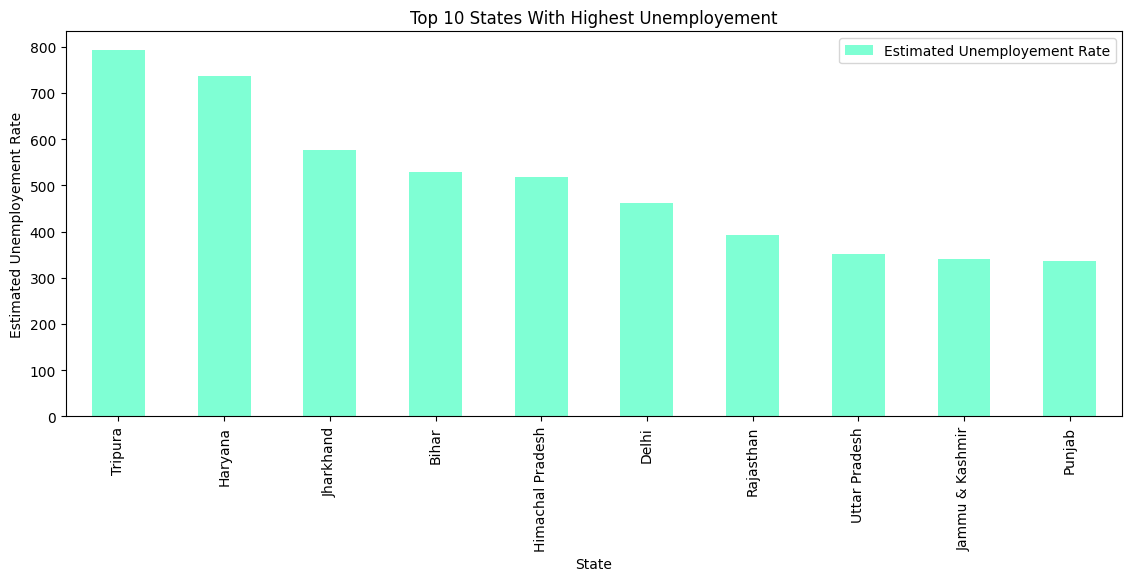

In [52]:
# Visualization 
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
df_a[:10].plot(kind='bar', color='aquamarine', figsize=(30,5),ax=ax0)
ax0.set_title('Top 10 States With Highest Unemployement')
ax0.set_xlabel('State')
ax0.set_ylabel('Estimated Unemployement Rate')

Text(0, 0.5, 'Estimated Unemployement Rate')

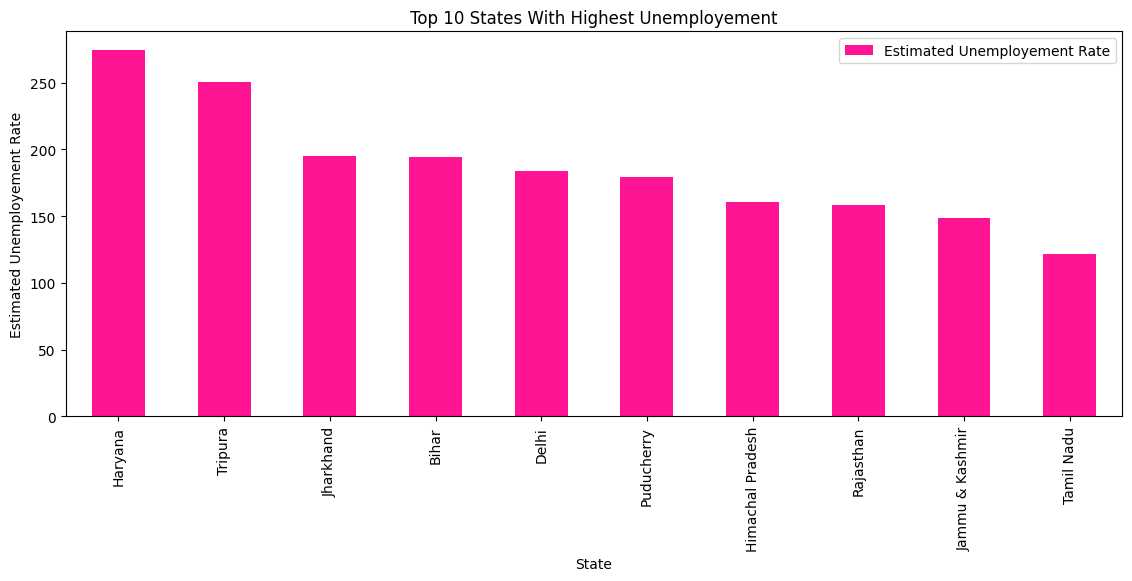

In [53]:
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
df_b[:10].plot(kind='bar', color='deeppink', figsize=(30,5),ax=ax0)
ax0.set_title('Top 10 States With Highest Unemployement')
ax0.set_xlabel('State')
ax0.set_ylabel('Estimated Unemployement Rate')

In [56]:
df_b = df[['month','Estimated Unemployement Rate']].groupby('month').sum().sort_values(by='Estimated Unemployement Rate',ascending=False)
df_b.head(10)

,Estimated Unemployement Rate
month,
May,1747.85
Apr,1205.72
Jun,1097.56
Mar,556.43
Oct,544.55
Nov,542.76
Feb,528.13
Jan,527.39
Aug,510.81


In [58]:
df_c = df2[['month','Estimated Unemployement Rate']].groupby('month').sum().sort_values('Estimated Unemployement Rate',ascending=False)
df_c.head(10)

,Estimated Unemployement Rate
month,
May,627.60
Apr,578.14
Jun,294.60
Mar,291.13
Aug,278.46
Jul,265.53
Feb,240.92
Jan,239.11
Sep,235.06


Text(0, 0.5, 'Estimated Unemployement Rate')

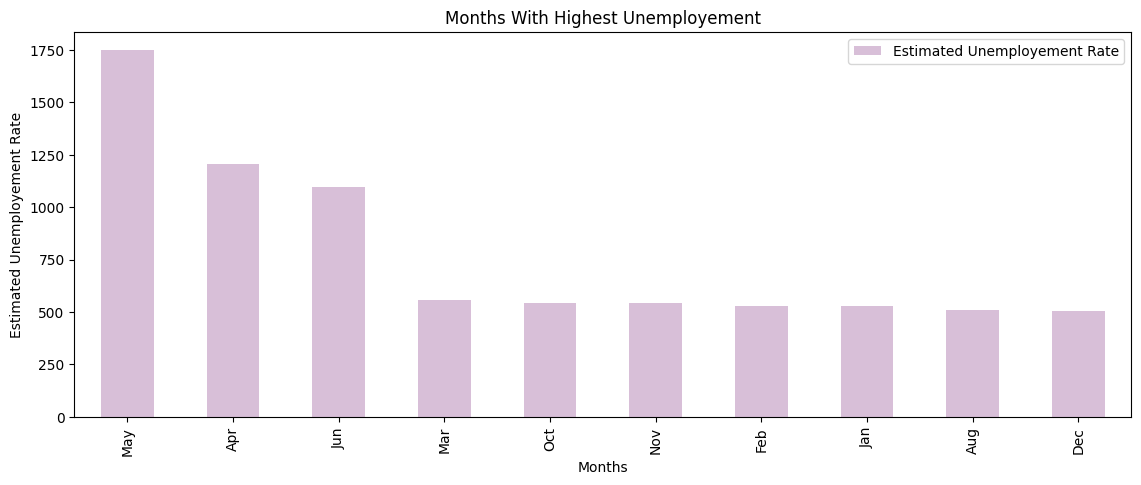

In [59]:
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
df_b[:12].plot(kind='bar', color='thistle', figsize=(30,5),ax=ax0)
ax0.set_title('Months With Highest Unemployement')
ax0.set_xlabel('Months')
ax0.set_ylabel('Estimated Unemployement Rate')

Text(0, 0.5, 'Estimated Unemployement Rate')

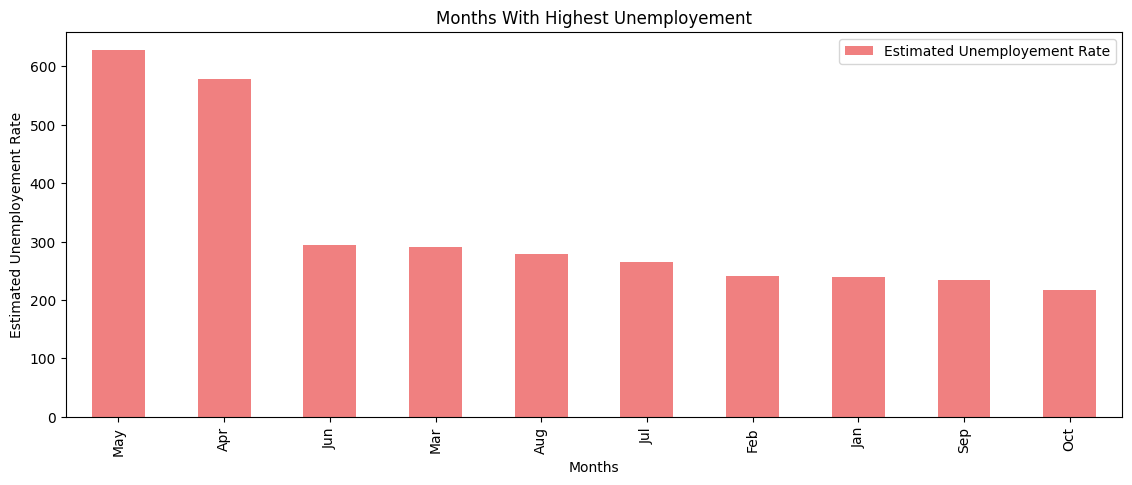

In [63]:
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
df_c[:12].plot(kind='bar', color='lightcoral', figsize=(30,5),ax=ax0)
ax0.set_title('Months With Highest Unemployement')
ax0.set_xlabel('Months')
ax0.set_ylabel('Estimated Unemployement Rate')

In [ ]:
# Visualize Labour Participation Rate And Unemployement Rate In Each Month 
df_11 = df.groupby (['month'])[['Estimated Unemployement Rate', 'Estimated Employed', ' Estimated Labour Participation Rate']].mean()
df_11 = pd.DataFrame(df_11).reset_index()
month = df_11.month
unmeployement_rate = df_11['Estimated Unemployement Rate']
labour_participation_rate = df_11['Estimated Labour Participation Rate']

fig=go.Figure()
fig.add_trace(go.Bar(x=month, y=unmeployement_rate, name='Unemployement Rate'))
fig.add_trace(go.Bar(x=month, y=labour_participation_rate, name='Labour Participation Rate'))

fig.update_layout(title='Unemployement Rate & Labour Participation Rate', xaxis = {'category' : ['Jan', 'Feb', 'March']})